# MCMC: Slice sampling

Florent Leclercq,<br/>
Institute of Cosmology and Gravitation, University of Portsmouth,<br/>
florent.leclercq@polytechnique.org

In [1]:
import numpy as np
from scipy.stats import norm, cauchy
from matplotlib import pyplot as plt
%matplotlib inline
from math import pi

## Slice sampling tutorial

### 1- Drawing y

Starting from an initial x, we draw y uniformly in $[0,f(x)]$.

In [2]:
gaussian=norm(0,1)
x=1.3
f_of_x=gaussian.pdf(x)
y=np.random.uniform(0.,f_of_x)

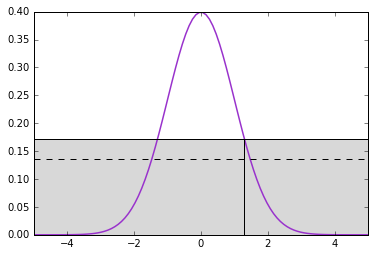

In [3]:
x_arr=np.linspace(-5,5,100)
plt.xlim(-5,5)
plt.plot(x_arr,gaussian.pdf(x_arr),color='darkorchid',linewidth=1.5)
plt.plot([x,x],[0,f_of_x],color='black')
plt.plot([-5,5],[f_of_x,f_of_x],color='black')
plt.plot([-5,5],[y,y],color='black',linestyle='--')
plt.fill_between([-5,5],0.,f_of_x,facecolor='grey',alpha=0.3, linewidth=0.)
plt.show()

### 2- Drawing x

We draw y uniformly in the "slice" where $f(x)\geq y$. In the case of the Gaussian distribution $G(0,1)$, this is drawing $x$ uniformly in $[-x_0,x_0]$ where $x_0=\sqrt{-2 \ln(y \sqrt{2\pi})}$.

In [4]:
x0=np.sqrt(-2*np.log(y*np.sqrt(2*pi)))
x_new=np.random.uniform(-x0,x0)

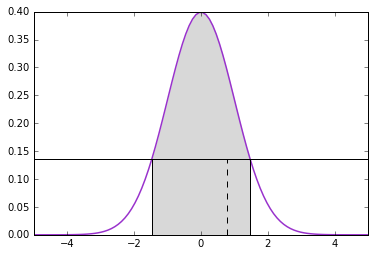

In [5]:
x_arr=np.linspace(-5,5,100)
x_slice_arr=np.linspace(-x0,x0,100)
plt.xlim(-5,5)
plt.plot(x_arr,gaussian.pdf(x_arr),color='darkorchid',linewidth=1.5)
plt.plot([-5,5],[y,y],color='black')
plt.plot([x0,x0],[0.,y],color='black')
plt.plot([-x0,-x0],[0.,y],color='black')
plt.plot([x_new,x_new],[0.,y],color='black',linestyle='--')
plt.fill_between(x_slice_arr,0.,gaussian.pdf(x_slice_arr),facecolor='grey',alpha=0.3, linewidth=0.)
plt.show()

### 3- Iterate!

In [6]:
def slice_sampler_gaussian(Nsteps,x_start):
    samples=np.zeros(Nsteps+1)
    samples[0]=x_start
    x=x_start
    for i in xrange(Nsteps):
        f_of_x=gaussian.pdf(x)
        y=np.random.uniform(0.,f_of_x)
        x0=np.sqrt(-2*np.log(y*np.sqrt(2*pi)))
        x=np.random.uniform(-x0,x0)
        samples[i+1]=x
    return samples

In [7]:
x_start=2.
Nsteps=99
samples=slice_sampler_gaussian(Nsteps,x_start)

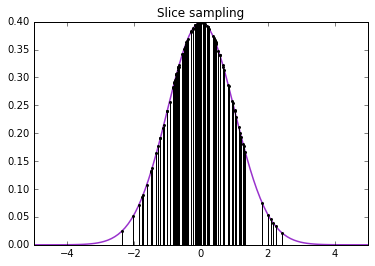

In [8]:
plt.xlim(-5,5)
plt.plot(x_arr,gaussian.pdf(x_arr),color='darkorchid',linewidth=1.5)
markerline, stemlines, baseline = plt.stem(samples,gaussian.pdf(samples))
plt.setp(markerline, color='black', markersize=3., markeredgewidth = 0.)
plt.setp(stemlines, color='black')
plt.title("Slice sampling")
plt.show()

## Slice sampling in practice and multimodal distributions

In [9]:
def target_pdf(x):
    return cauchy(scale=0.5,loc=0.8).pdf(x)+0.5*norm(2.8,0.3).pdf(x)
target_pdf=np.vectorize(target_pdf)

In [10]:
a=-2.
b=5.
x_arr=np.linspace(a,b,200.)
f_arr=target_pdf(x_arr)

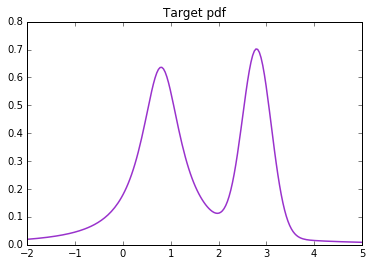

In [11]:
plt.xlim(a,b)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
plt.title("Target pdf")
plt.show()

In [12]:
def slice_sampler(target_pdf,Nsamp,x_start,x_width):
    samples=[]
    x=x_start
    while len(samples)<Nsamp:
        y=np.random.uniform(0, target_pdf(x))
        lb=x
        rb=x
        # we build the approximate slice by expanding around the current x
        while y<target_pdf(lb):
            lb-=x_width
        while y<target_pdf(rb):
            rb+=x_width
        # we draw a new x
        x=np.random.uniform(lb,rb)
        if target_pdf(x)>y:
            # x was in the slice, we keep it as a sample
            samples.append(x)
        else:
            # x was not in the slice, we adjust the boundaries of the approximate slice
            if np.abs(x-lb)<np.abs(x-rb):
                lb = x
            else:
                rb = x
    return samples

In [13]:
# a width too small to explore the different modes
x_width=0.05

In [14]:
Nsamp=20
x_start=2.9
samples=slice_sampler(target_pdf,Nsamp,x_start,x_width)

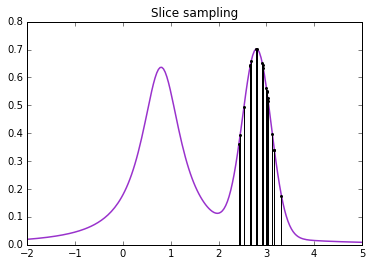

In [15]:
plt.xlim(a,b)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
markerline, stemlines, baseline = plt.stem(samples,target_pdf(samples))
plt.setp(markerline, color='black', markersize=3., markeredgewidth = 0.)
plt.setp(stemlines, color='black')
plt.title("Slice sampling")
plt.show()

In [16]:
# a good width to explore the multimodal distribution
x_width=0.5

In [17]:
Nsamp=150
x_start=3.2
samples=slice_sampler(target_pdf,Nsamp,x_start,x_width)

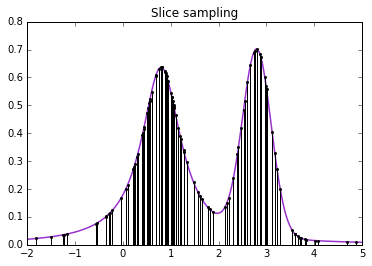

In [18]:
plt.xlim(a,b)
plt.plot(x_arr,f_arr,color='darkorchid',linewidth=1.5)
markerline, stemlines, baseline = plt.stem(samples,target_pdf(samples))
plt.setp(markerline, color='black', markersize=3., markeredgewidth = 0.)
plt.setp(stemlines, color='black')
plt.title("Slice sampling")
plt.show()